Implement a rolling Bollinger band strategy. Whenever the stock close price breaks the lower band buy it,  whenever it breaks the upper band sell it. Keep the threshold at 2 bands and window size at 10 days. To test it out use the previous CSV file.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("goog.csv", parse_dates=['Date'])#, index_col='Date')
df['Close_upper'] = df['Close'].rolling(window=10).mean() + 2*df['Close'].rolling(window=10).std()
df['Close_lower'] = df['Close'].rolling(window=10).mean() - 2*df['Close'].rolling(window=10).std()
df.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Close_upper,Close_lower
0,2014-03-27,568.000,568.00,552.92,558.46,13100.0,0.0,1.0,568.000,568.00,552.92,558.46,13100.0,NaN,NaN
1,2014-03-28,561.200,566.43,558.67,559.99,41100.0,0.0,1.0,561.200,566.43,558.67,559.99,41100.0,NaN,NaN
2,2014-03-31,566.890,567.00,556.93,556.97,10800.0,0.0,1.0,566.890,567.00,556.93,556.97,10800.0,NaN,NaN
3,2014-04-01,558.710,568.45,558.71,567.16,7900.0,0.0,1.0,558.710,568.45,558.71,567.16,7900.0,NaN,NaN
4,2014-04-02,565.106,604.83,562.19,567.00,146700.0,0.0,1.0,565.106,604.83,562.19,567.00,146700.0,NaN,NaN


In [3]:
#Generate the crossing signal
df['upper_break'] = 0
df['lower_break'] = 0

df['upper_break'][10:] = np.where(df['Close'][10:] > df['Close_upper'][10:], 1,0) 
df['lower_break'][10:] = np.where(df['Close'][10:] < df['Close_lower'][10:], 1,0)

df.iloc[30:50,:]

C:\Users\dnly\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\dnly\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Close_upper,Close_lower,upper_break,lower_break
30,2014-05-09,510.75,519.9000,504.200,518.73,2432800.0,0.0,1.0,510.75,519.9000,504.200,518.73,2432800.0,537.026951,505.659049,0,0
31,2014-05-12,523.51,530.1900,519.010,529.92,1907300.0,0.0,1.0,523.51,530.1900,519.010,529.92,1907300.0,538.856387,506.383613,0,0
32,2014-05-13,530.89,536.0700,529.510,533.09,1648900.0,0.0,1.0,530.89,536.0700,529.510,533.09,1648900.0,540.467378,505.850622,0,0
33,2014-05-14,533.00,533.0000,525.290,526.65,1188500.0,0.0,1.0,533.00,533.0000,525.290,526.65,1188500.0,540.465480,505.850520,0,0
34,2014-05-15,525.70,525.8700,517.420,519.98,1699700.0,0.0,1.0,525.70,525.8700,517.420,519.98,1699700.0,538.405927,505.636073,0,0
35,2014-05-16,521.39,521.8000,515.440,520.63,1481200.0,0.0,1.0,521.39,521.8000,515.440,520.63,1481200.0,537.147827,505.434173,0,0
36,2014-05-19,519.70,529.7800,517.583,528.86,1274300.0,0.0,1.0,519.70,529.7800,517.583,528.86,1274300.0,537.457269,505.334731,0,0
37,2014-05-20,529.74,536.2300,526.300,529.77,1779900.0,0.0,1.0,529.74,536.2300,526.300,529.77,1779900.0,539.052311,506.665689,0,0
38,2014-05-21,532.90,539.1828,531.910,538.94,1193000.0,0.0,1.0,532.90,539.1828,531.910,538.94,1193000.0,542.062865,509.451135,0,0
39,2014-05-22,541.13,547.5999,540.780,545.06,1611400.0,0.0,1.0,541.13,547.5999,540.780,545.06,1611400.0,545.989714,512.336286,0,0


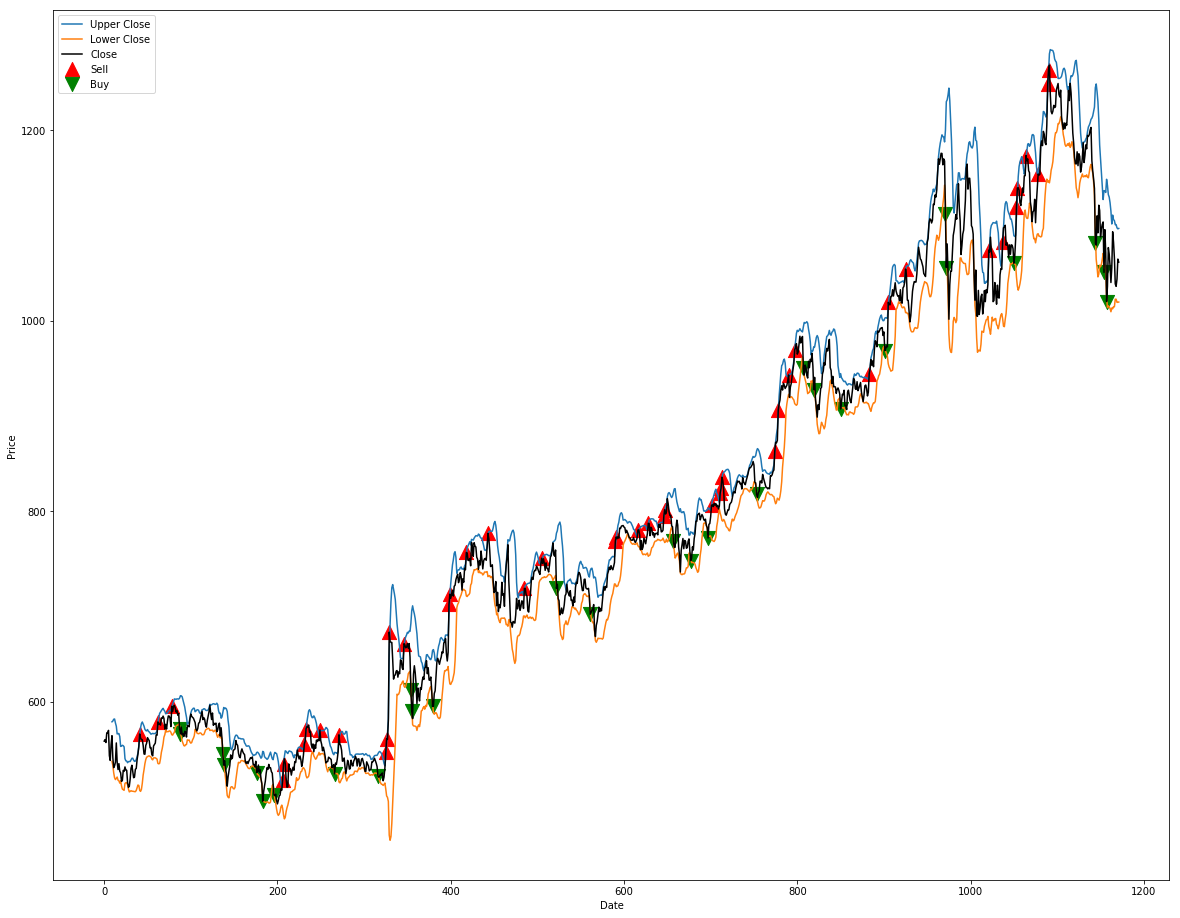

In [4]:
plt.figure(figsize=(20,16))
plt.plot(df.index, df['Close_upper'], label="Upper Close")
plt.plot(df.index, df['Close_lower'], label="Lower Close")
plt.plot(df.index, df['Close'], label="Close", color = 'black')

sell_signal = np.where(df['upper_break'] == 1)
plt.scatter(df.loc[sell_signal].index,
            df.iloc[sell_signal]['Close'],
            marker = "^", color = 'red', label = "Sell",s=200)

buy_signal = np.where(df['lower_break'] == 1)
plt.scatter(df.loc[buy_signal].index,
            df.iloc[buy_signal]['Close'],
            marker = "v", color = 'green', label = "Buy",s=200)

plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc="best")
plt.show()

Implement a buy and hold strategy. Buy 100 shares of a stock and hold it forever. Is this anymore profitable than the previous two strategies?

In [5]:
df['buy_action'] = df['lower_break'].diff()
df['buy_action'][df['buy_action'] < 0] = 0

df['sell_action'] = df['upper_break'].diff()
df['sell_action'][df['sell_action'] < 0] = 0

# Setting all sell actions to 0 before the first buy
df['sell_action'][df.index < df.index[df['buy_action'] == 1][0]] = 0

# Implementing moving average with 100 stock increments
df['action'] = 100 * (df['sell_action'] - df['buy_action'])
df['profit'] = df['action'] * df['Close']

# Creating metrics to evaluate moving average strategy
df['Total Securities'] = df['action'].cumsum()
df['Capital'] = df['profit'].cumsum()
df['Portfolio Value'] = df['Total Securities'] * df['Close'] + df['Capital']

# Creating the buy and hold strategy for 100 stocks
df_buy_hold = 100 * df['Close']


C:\Users\dnly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dnly\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\dnly\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
# There have been more sell than buy signals overall so this has generated negative stock counts in the portfolio
# The action of this cell will be to purchase the stock balance so that the account has 0 stocks at the end
df['Portfolio Value'][-1:] -= df['action'].sum()*df['Close'][-1:]

C:\Users\dnly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


The moving average strategy has a Sharpe ratio of:  0.8620444606956962
The buy-hold strategy has a Sharpe ratio of:  3.7000996084936117
The present scaled value of the moving stratgy portfolio is:  1171    14.324213
Name: Portfolio Value, dtype: float64
The present scaled value of the buy and hold strategy portfolio is:  1171    190.074491
Name: Close, dtype: float64


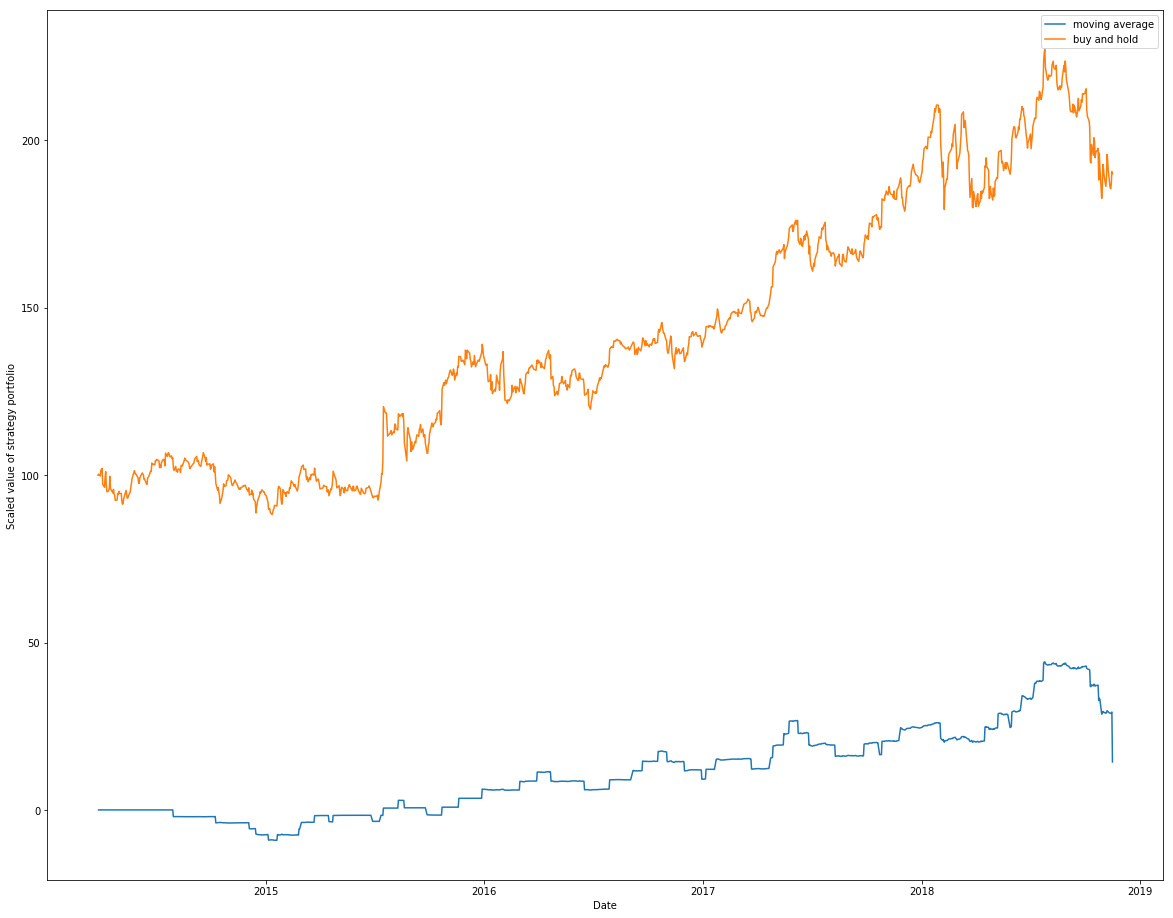

In [7]:
print('The moving average strategy has a Sharpe ratio of: ', df['Portfolio Value'].mean()/df['Portfolio Value'].std())
print('The buy-hold strategy has a Sharpe ratio of: ', df_buy_hold.mean()/df_buy_hold.std())
print('The present scaled value of the moving stratgy portfolio is: ',
      df['Portfolio Value'][-1:]/abs(df.loc[df.index[df['buy_action'] == 1][0], 'profit']))
print('The present scaled value of the buy and hold strategy portfolio is: ', df_buy_hold[-1:]/df['Close'][0])

plt.figure(figsize=(20,16))

# Plotting the scaled values of the portfolios based on initial value
plt.plot(df['Date'], df['Portfolio Value'] / abs(df.loc[df.index[df['buy_action'] == 1][0], 'profit']),
         label='moving average')
plt.plot(df['Date'], df_buy_hold/df['Close'][0], label='buy and hold')
plt.xlabel('Date')
plt.ylabel('Scaled value of strategy portfolio')
plt.legend()
plt.show()